<a href="https://colab.research.google.com/github/spandit98/Transport_Demand_Prediction/blob/main/Demand_Prediction_for_Public_Transport_(Combined)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing librories

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the csv file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/transport demand/Data & Resources/Nairobi Transport Data.zip')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,FIAHLIESPM,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,FIAHLIESPM,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df.shape

(51645, 10)

Dataset has 51645 rows and 10 columns

#<b>Data Cleaning

Finding Null values in each column

In [ ]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

There are no null values

In [ ]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(51645, 10)

Shape is same so there are no duplicate values

#<b>Exploratory Analysis and Visualization

##Type of transportation

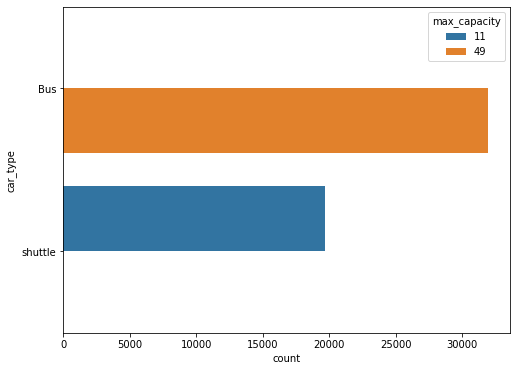

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['car_type'], hue=df['max_capacity'])

There are two types of transportation, one is Bus which has maximum capacity 49 other is Shuttle with maximum capacity 11

##Payment Method

([<matplotlib.patches.Wedge at 0x7fc15675d310>,
 [Text(-1.0999740124079396, 0.007561218630501732, 'Mpesa'),
  Text(1.0999740121092798, -0.0075612620781424465, 'cash')],
 [Text(-0.5999858249497851, 0.004124301071182762, '99.8%'),
  Text(0.5999858247868798, -0.004124324769895879, '0.2%')])

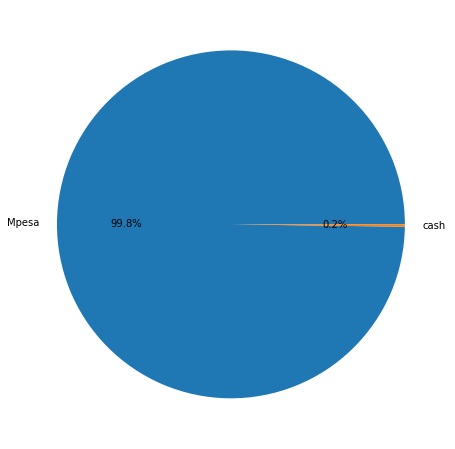

In [ ]:
plt.subplots(figsize=(14,8))
payment_type=df.payment_method.value_counts()
plt.pie(payment_type,labels=['Mpesa','cash'],autopct='%1.1f%%')

Almost all the payments are done in Mpesa, we can see very negligible cash payment

##Starting point

Text(0.5, 1.0, 'travel')

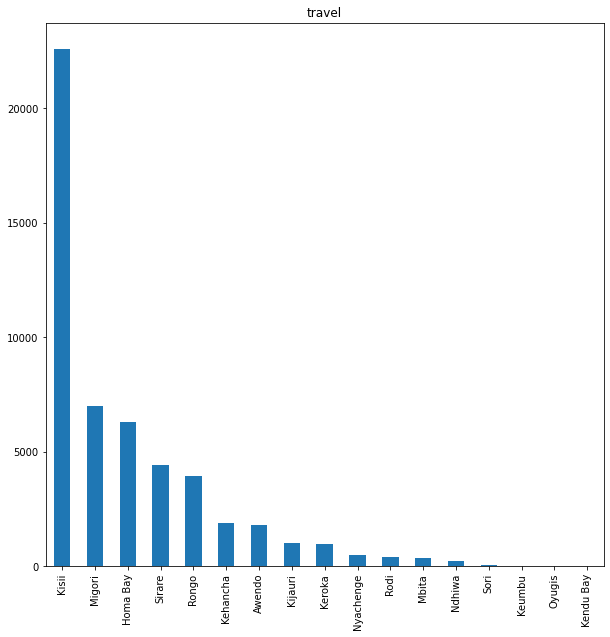

In [ ]:
plt.subplots(figsize=(10,10))
df.travel_from.value_counts().plot(kind='bar')
plt.title('travel')

Most of the transportation taking place from Kisii to Nairobi

##Time wise frequency of transpot 

In [ ]:
highest_no_of_buses=df.travel_time.value_counts()

Text(0.5, 1.0, 'travel')

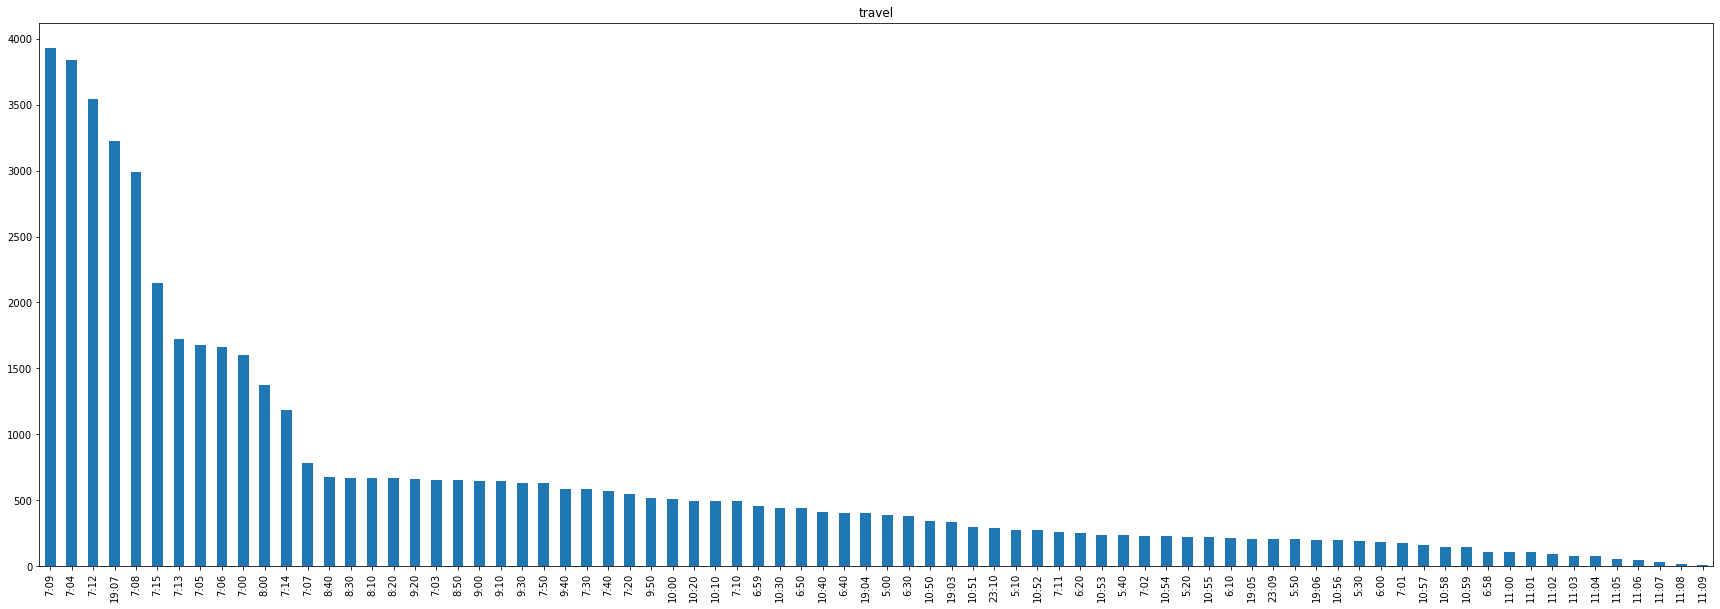

In [ ]:
plt.subplots(figsize=(30,10))
highest_no_of_buses.plot(kind='bar')
plt.title('travel')

We are expected to have most number of vehicles to depart at 7:09.

In [ ]:
x=df[(df['travel_time']=='7:09')]['travel_from']

In [ ]:
rides_at_709=x.value_counts()

Text(0.5, 1.0, 'travel')

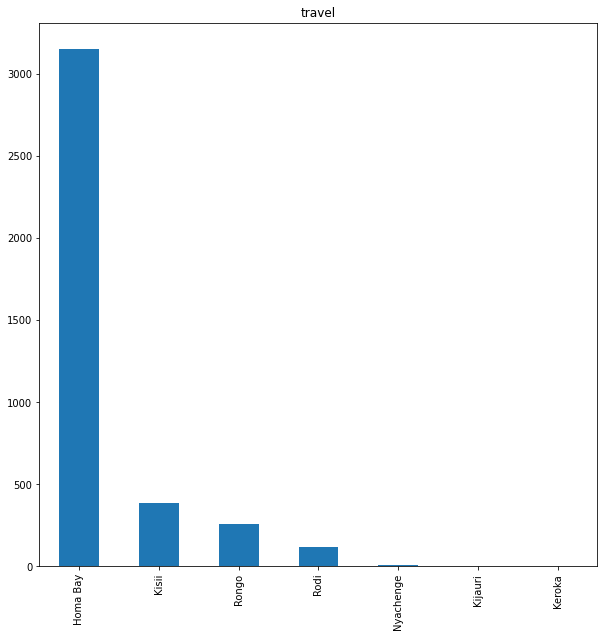

In [ ]:
plt.subplots(figsize=(10,10))
rides_at_709.plot(kind='bar')
plt.title('travel')

The most number of rides start from Homa Bay at 7:09.

#<b>Data Preprocessing

##The dependent variable isn't given in the dataset, so as our problem statement suggests, we need to predict our number of seats as per each source, with specific date.

In [ ]:
df['seats_occupied']=df.groupby(['car_type','travel_date','travel_time','travel_from'])['travel_time'].transform('count')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


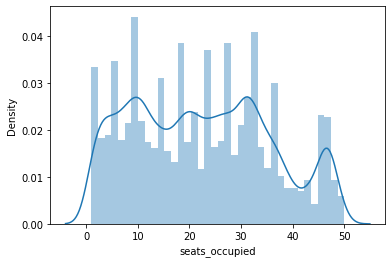

In [ ]:
sns.distplot(df[df['car_type']=='Bus']['seats_occupied'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


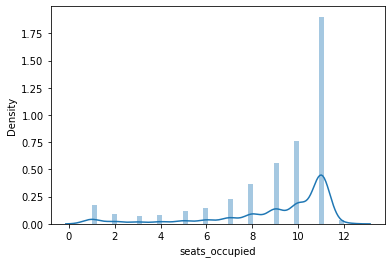

In [ ]:
sns.distplot(df[df['car_type']=='shuttle']['seats_occupied'])

In [ ]:
df[df['max_capacity']<df['seats_occupied']]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
11858,8124,10,Mpesa,0JV6LE7DLQ,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12
11867,8124,9,Mpesa,UWGS4FIL7R,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12
11868,8124,1X,Mpesa,HIHF7UODUL,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12
11869,8124,5,Mpesa,NS3ZEUHTLX,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12
11870,8124,6,Mpesa,BLUBAEACXM,13-02-18,7:00,Kisii,Nairobi,shuttle,11,12
...,...,...,...,...,...,...,...,...,...,...,...
40630,12307,3,Cash,MCG9AZOATB,16-03-18,5:00,Keroka,Nairobi,shuttle,11,12
40631,12307,1X,Cash,MCG8AXV7VQ,16-03-18,5:00,Keroka,Nairobi,shuttle,11,12
40632,12307,3,Cash,SAKQGWLMQP,16-03-18,5:00,Keroka,Nairobi,shuttle,11,12
40633,12307,2,Cash,MCG1AXRHJ5,16-03-18,5:00,Keroka,Nairobi,shuttle,11,12


In [ ]:
index=df[df['max_capacity']<df['seats_occupied']].index

In [ ]:
index

Int64Index([11858, 11867, 11868, 11869, 11870, 11871, 11872, 11873, 11875,
            11880,
            ...
            40625, 40626, 40627, 40628, 40629, 40630, 40631, 40632, 40633,
            40634],
           dtype='int64', length=194)

we can see that few rows has seat accupied is greater than maximum capacity which is unlikly to happen so we are dropping these rows as number of these rows are ngligible compared to total dataset

In [ ]:
df.drop(index=index, inplace=True)

payment_receipt and seat_number are unique value. they do not required for our modelling 

In [ ]:
df.drop(columns={'payment_receipt','seat_number'},inplace=True)

In [ ]:
df.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
0,1442,Mpesa,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,Mpesa,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,Mpesa,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,Mpesa,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
df[(df['car_type']=='Bus') & (df['travel_date']=='27-11-17') & (df['travel_time']=='7:09') & (df['travel_from']=='Homa Bay')]

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
9,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
10,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
11,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
21,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
32,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
49,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
51,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
64,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
65,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
66,5781,Mpesa,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26


As we can see that the Ride_id is same for perticular transportation vehicle at perticular travell time, date and starting point.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(6278, 9)

Finally there are 6278 unique rides 

#One hat encoding 

In [ ]:
df=pd.get_dummies(df,columns=['travel_from'],drop_first=True)

In [ ]:
df['payment_method'].replace({'Mpesa':1,'Cash':0},inplace=True)

In [ ]:
df['car_type'].replace({'Bus':1,'shuttle':0},inplace=True)

#Combining travel date and travel time

In [ ]:
df['Date_time']=df['travel_date']+' '+df['travel_time']

In [ ]:
df["Date_time"]=pd.to_datetime(df["Date_time"])
df["date"]=df["Date_time"].dt.day
df["hour"]=df["Date_time"].dt.hour
df["minute"]=df["Date_time"].dt.minute
df["year"]=df["Date_time"].dt.year
df["month"]=df["Date_time"].dt.month

In [ ]:
df.drop(columns={'travel_date','travel_time'},inplace=True)

In [ ]:
df.head()

,ride_id,payment_method,travel_to,car_type,max_capacity,seats_occupied,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,Date_time,hour,minute,year,month,date
0,1442,1,Nairobi,1,49,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-10-17 07:15:00,7,15,2017,10,17
1,5437,1,Nairobi,1,49,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-11-19 07:12:00,7,12,2017,11,19
2,5710,1,Nairobi,1,49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2017-11-26 07:05:00,7,5,2017,11,26
3,5777,1,Nairobi,1,49,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-11-27 07:10:00,7,10,2017,11,27
4,5778,1,Nairobi,1,49,31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-11-27 07:12:00,7,12,2017,11,27


In [ ]:
df.dtypes

ride_id                           int64
payment_method                    int64
travel_to                        object
car_type                          int64
max_capacity                      int64
seats_occupied                    int64
travel_from_Homa Bay              uint8
travel_from_Kehancha              uint8
travel_from_Kendu Bay             uint8
travel_from_Keroka                uint8
travel_from_Keumbu                uint8
travel_from_Kijauri               uint8
travel_from_Kisii                 uint8
travel_from_Mbita                 uint8
travel_from_Migori                uint8
travel_from_Ndhiwa                uint8
travel_from_Nyachenge             uint8
travel_from_Oyugis                uint8
travel_from_Rodi                  uint8
travel_from_Rongo                 uint8
travel_from_Sirare                uint8
travel_from_Sori                  uint8
Date_time                datetime64[ns]
hour                              int64
minute                            int64


The Date_time is in object formate. We have to covert into datetime formate

#Finding Correlation

In [ ]:
correlarion=df.corr()

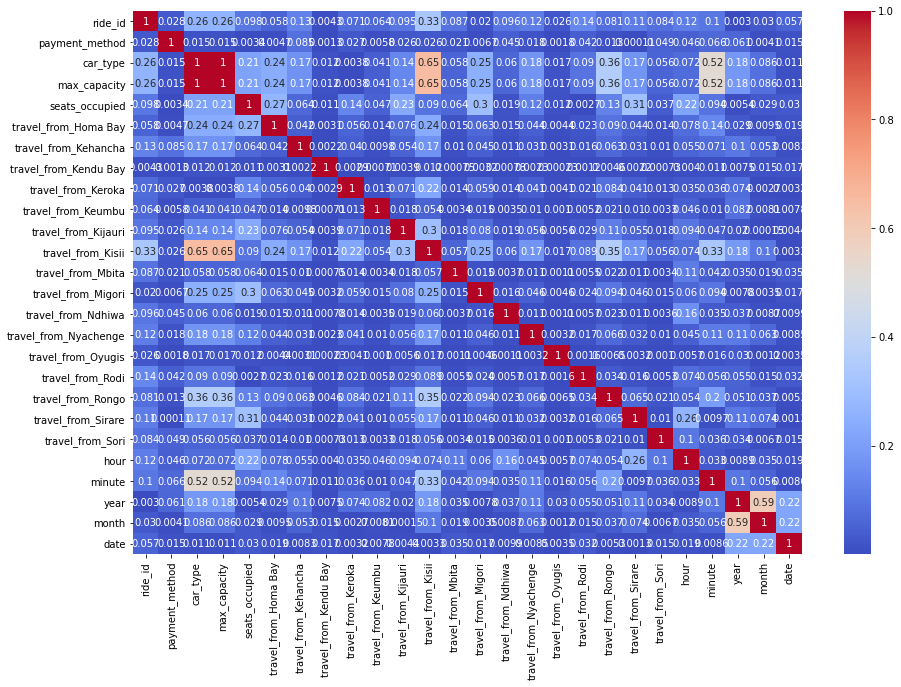

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(correlarion),cmap='coolwarm',annot=True)

#<b>Models and Algorithms

In [ ]:
df.columns

Index(['ride_id', 'payment_method', 'travel_to', 'car_type', 'max_capacity',
       'seats_occupied', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'Date_time', 'hour', 'minute',
       'year', 'month', 'date'],
      dtype='object')

In [ ]:
independent_variables=df.columns.drop(['ride_id','travel_to','seats_occupied','Date_time'])

In [ ]:
dependent_variable='seats_occupied'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df[independent_variables],df[dependent_variable],random_state=0)

##Linear Regression

In [ ]:
lin=LinearRegression()
lin.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin.coef_

array([-5.66153141e-01, -3.88672558e-04, -1.47695572e-02,  7.64015473e+00,
        1.54560676e+00, -8.86394946e+00, -7.68742492e+00, -9.64876983e+00,
       -8.59910285e+00, -3.58283447e+00,  4.89664742e+00,  8.11035649e+00,
       -3.74910058e+00, -7.65614911e+00, -8.88178420e-15, -4.10320749e+00,
       -5.35035922e+00,  1.07108017e+01, -1.03234955e+01,  4.87384634e-01,
       -2.45803566e-02, -1.32875781e+00, -3.80900446e-02, -3.55236806e-02])

In [ ]:
lin.intercept_

2690.1866269286975

In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,lin.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,lin.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,lin.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,lin.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,lin.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,lin.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,lin.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,lin.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  44.77833784888423
MSE test :  49.782891611441386
RMSE train :  6.691661815190919
RMSE test :  7.055699229094263
R2 for train :  0.3876131649669401
R2 for test :  0.3647006731699052
Adjusted R2 for train :  0.3844747314754189
Adjusted R2 for test :  0.3548319457628357


Linear Regression giving less R2 and Adj R2 score. It is not a good model for this data

##Lasso, Ridge and Elastic Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
#lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(Xtrain, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50492.8906039573, tolerance: 28.43803844928305
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38843.40525088607, tolerance: 27.56325979819434
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7750.84408821183, tolerance: 28.042865427509277
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31311.3122426

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -45.27096140479107


In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,lasso_regressor.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,lasso_regressor.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,lasso_regressor.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,lasso_regressor.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,lasso_regressor.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,lasso_regressor.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,lasso_regressor.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,lasso_regressor.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  44.778410603480495
MSE test :  49.77883870026386
RMSE train :  6.691667251401589
RMSE test :  7.055412014919034
R2 for train :  0.3876121699778653
R2 for test :  0.3647523939852182
Adjusted R2 for train :  0.38447373138710483
Adjusted R2 for test :  0.3548844700082895


In [ ]:
#Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(Xtrain, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67052e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.68466e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66907e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67942e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67052e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -45.26230277195466


In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,ridge_regressor.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,ridge_regressor.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,ridge_regressor.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,ridge_regressor.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,ridge_regressor.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,ridge_regressor.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,ridge_regressor.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,ridge_regressor.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  44.78695208137154
MSE test :  49.749679669193846
RMSE train :  6.6923054384398455
RMSE test :  7.053345282147602
R2 for train :  0.3874953570530566
R2 for test :  0.36512450400555185
Adjusted R2 for train :  0.3843563198054105
Adjusted R2 for test :  0.3552623603784536


In [ ]:
#Elastic
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet()
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = [0.001,0.01,1,10,20,50,100,1000]
search = GridSearchCV(elastic, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
# perform the search
results = search.fit(Xtrain, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99775.523812138, tolerance: 34.42536686491073
  positive)


In [ ]:
print("The best fit alpha value is found out to be :" ,results.best_params_)
print("\nUsing ",results.best_params_, " the negative mean squared error is: ", results.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.01}

Using  {'alpha': 0.0001, 'l1_ratio': 0.01}  the negative mean squared error is:  -4.661185074469172


In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,results.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,results.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,results.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,results.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,results.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,results.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,results.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,results.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  44.781122098735885
MSE test :  49.76472267683018
RMSE train :  6.69186985070211
RMSE test :  7.054411575519973
R2 for train :  0.3875750876725047
R2 for test :  0.36493253418789917
Adjusted R2 for train :  0.3844364590378987
Adjusted R2 for test :  0.3550674085053811


Lasso, Ridge and Elastic Regression also not improving the model performence

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 32, random_state = 0,max_depth=15)
grid_values = {'n_estimators':[12,20,30,50, 80,  100, 120], 'max_depth':[5, 10, 15, 20,25,30,35,40]}
random_forest = GridSearchCV(regressor, param_grid = grid_values, cv=5)
random_forest.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=15,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=32, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=Non

In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,random_forest.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,random_forest.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,random_forest.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,random_forest.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,random_forest.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,random_forest.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,random_forest.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,random_forest.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  12.02797059939884
MSE test :  29.529190907274494
RMSE train :  3.4681364735833045
RMSE test :  5.434076821988671
R2 for train :  0.835505934318192
R2 for test :  0.6231662224112884
Adjusted R2 for train :  0.8346629154037433
Adjusted R2 for test :  0.6173124938273861


By using Random Forest we are getting moderate test score

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor(random_state = 0,max_depth=70,max_leaf_nodes=55) 
tree.fit(Xtrain, Ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=70,
                      max_features=None, max_leaf_nodes=55,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,tree.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,tree.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,tree.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,tree.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,tree.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,tree.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,tree.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,tree.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  25.850339086112328
MSE test :  34.9831170923801
RMSE train :  5.084322873904875
RMSE test :  5.914652744868468
R2 for train :  0.6464717517899072
R2 for test :  0.5535664960429971
Adjusted R2 for train :  0.6446599478272674
Adjusted R2 for test :  0.5466316066611407


##XGBOOST

In [ ]:
import xgboost as xgb
reg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
reg.fit(Xtrain, Ytrain)

[16:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.004, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,tree.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,tree.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,tree.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,tree.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,tree.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,tree.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,tree.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,tree.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  25.850339086112328
MSE test :  34.9831170923801
RMSE train :  5.084322873904875
RMSE test :  5.914652744868468
R2 for train :  0.6464717517899072
R2 for test :  0.5535664960429971
Adjusted R2 for train :  0.6446599478272674
Adjusted R2 for test :  0.5466316066611407


In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[16:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   36.2s finished


[16:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
print('MSE train : ',mean_squared_error(Ytrain,reg_gs.predict(Xtrain)))
print('MSE test : ',mean_squared_error(Ytest,reg_gs.predict(Xtest)))
print('RMSE train : ',np.sqrt(mean_squared_error(Ytrain,reg_gs.predict(Xtrain))))
print('RMSE test : ',np.sqrt(mean_squared_error(Ytest,reg_gs.predict(Xtest))))
print('R2 for train : ',r2_score(Ytrain,reg_gs.predict(Xtrain)))
print('R2 for test : ',r2_score(Ytest,reg_gs.predict(Xtest)))
print("Adjusted R2 for train : ",1-(1-r2_score(Ytrain,reg_gs.predict(Xtrain)))*((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1)))
print("Adjusted R2 for test : ",1-(1-r2_score(Ytest,reg_gs.predict(Xtest)))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))

MSE train :  15.582775811578122
MSE test :  28.12748676857302
RMSE train :  3.9475024777165273
RMSE test :  5.303535308506301
R2 for train :  0.7868905542566977
R2 for test :  0.6410539277435223
Adjusted R2 for train :  0.7857983854124015
Adjusted R2 for test :  0.6354780664269168
